In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/laptop-price/laptop_price.csv


In [2]:
data=pd.read_csv("/kaggle/input/laptop-price/laptop_price.csv", encoding="latin-1")

In [3]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


/tmp/ipykernel_20/1623508889.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, index)
/tmp/ipykernel_20/1623508889.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
/tmp/ipykernel_20/1623508889.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use th

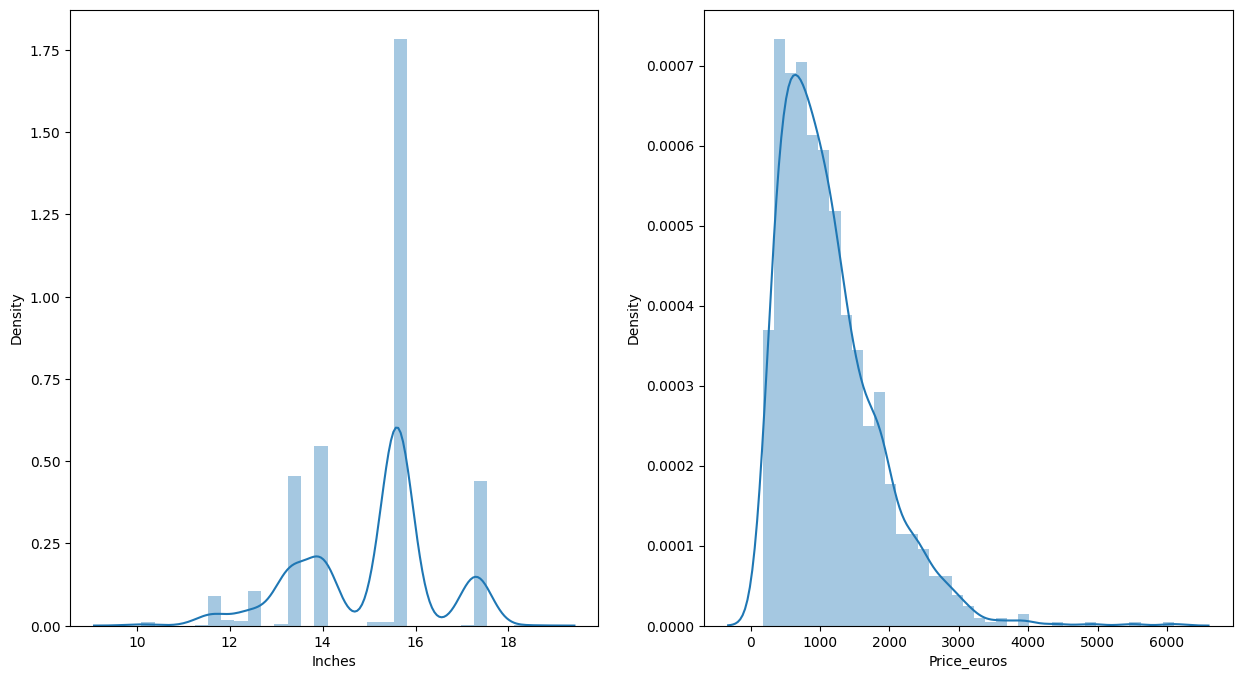

In [5]:
lis = ['Inches', 'Price_euros'] 
plt.subplots(figsize=(15, 8)) 
index = 1
  
for i in lis: 
    plt.subplot(1, 2, index) 
    sns.distplot(data[i]) 
    index += 1

In [6]:
data=data.drop("Product",axis=1)
data=data.drop("laptop_ID",axis=1)

In [7]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [8]:
data.TypeName.value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [9]:
data["ScreenResolution"]=data.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
x=data["ScreenResolution"].str.split("x").apply(lambda x: int(x[0]) * int(x[-1]) )
#data.drop("ScreenResolution",axis=1)
data=data.assign(ScreenResolution=x)

In [10]:
data.Cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [11]:
cpu_brand=data.Cpu.str.split(" ").apply(lambda x: x[0])
data["Cpu"]=data.Cpu.str.split(" ").apply(lambda x: x[-1])
data["Cpu"]=data.Cpu.apply(lambda x: x[0:len(x)-3])
data["Cpu"]=data.Cpu.apply(lambda x: float(x))
data.insert(5,'cpu_brand',cpu_brand)

In [12]:
data["Ram"]=data.Ram.apply(lambda x:int(x[0:len(x)-2]))
data.Ram.value_counts()

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

In [13]:
memory_size=data.Memory.str.split(" ").apply(lambda x: x[0])
memory_size=[float(x[0:len(x)-2])*1024 if x[len(x)-2:]=='TB' else float(x[0:len(x)-2]) for x in memory_size]
memory_size=[int(x) for x in memory_size]

In [14]:
memory_type=data.Memory.str.split(" ").apply(lambda x: x[1])
memory_type.unique()

array(['SSD', 'Flash', 'HDD', 'Hybrid'], dtype=object)

In [15]:
data.insert(8,'memory_size',memory_size)
data.insert(9,'memory_type',memory_type)
data=data.drop('Memory',axis=1)

In [16]:
data.Gpu.value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [17]:
data["Gpu"]=data.Gpu.str.split(" ").apply(lambda x: x[0])

In [18]:
data["Weight"]=data.Weight.apply(lambda x: float(x[:len(x)-2]))

In [19]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,cpu_brand,Ram,memory_size,memory_type,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,4096000,2.3,Intel,8,128,SSD,Intel,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1296000,1.8,Intel,8,128,Flash,Intel,macOS,1.34,898.94
2,HP,Notebook,15.6,2073600,2.5,Intel,8,256,SSD,Intel,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,5184000,2.7,Intel,16,512,SSD,AMD,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,4096000,3.1,Intel,8,256,SSD,Intel,macOS,1.37,1803.60


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   int64  
 4   Cpu               1303 non-null   float64
 5   cpu_brand         1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   memory_size       1303 non-null   int64  
 8   memory_type       1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 132.5+ KB


In [21]:
cols=['Inches','ScreenResolution','Cpu','Ram','memory_size','Weight','Price_euros']
scaler = StandardScaler()
scaler.fit(data[cols])
sc=scaler.transform(data[cols])
data[cols]=sc

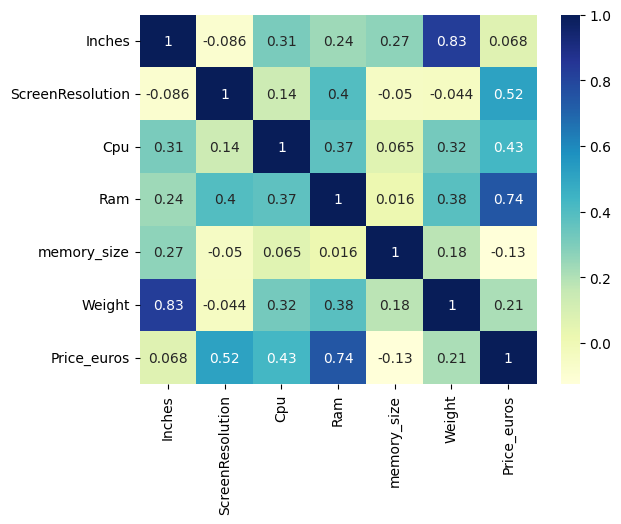

In [22]:
dataplot = sns.heatmap(data[cols].corr(), cmap="YlGnBu", annot=True) 
plt.show()

In [23]:
data=data.drop('Weight',axis=1)

In [24]:
encoder = OneHotEncoder()
encoder.fit(data)
data = encoder.transform(data)

In [25]:
data.shape

(1303, 51)

In [26]:
y=data['Price_euros']
x=data.drop('Price_euros',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.15,random_state=40)

In [27]:
kwargs = {
    'n_estimators': 150,
    'criterion': 'squared_error',
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'min_weight_fraction_leaf': 0.00,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'bootstrap': True,
    'oob_score': True,
    'n_jobs': None,
    'random_state': 20,
    'verbose': 0,
    'warm_start': False,
    'ccp_alpha': 0.00,
    'max_samples': None,
}
rfc = RandomForestRegressor(**kwargs)
rfc.fit(x_train,y_train)


RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=150,
                      oob_score=True, random_state=20)

In [28]:
print(rfc.oob_score_)

0.8350771114328703


In [29]:
print(rfc.score(x_test,y_test))

0.8321168236792957


In [30]:
y_pred=rfc.predict(x_test)
print(rfc.score(x_test,y_pred))

1.0
